# Statistics Visualization for Species Identifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from itertools import chain
from PIL import Image
import os

In [3]:
csv_file = "../test_dataset/ca_classifier/final_output_with_softmax_and_census.csv"

df = pd.read_csv(csv_file)

df['ca_true'] = df['annot census']
df['ca_pred'] = df['annotations_census']


gt_individual_counts = df['ca_true'].value_counts()
pred_individual_counts = df['ca_pred'].value_counts()

# 6. Print out the results
print("== Ground Truth: Individual Viewpoint Counts ==")
print(gt_individual_counts, "\n")

print("== Predicted: Individual Viewpoint Counts ==")
print(pred_individual_counts, "\n")


== Ground Truth: Individual Viewpoint Counts ==
ca_true
False    173
True      81
Name: count, dtype: int64 

== Predicted: Individual Viewpoint Counts ==
ca_pred
False    184
True      70
Name: count, dtype: int64 



In [4]:
def plot_confusion_matrix(true_labels, pred_labels, figsize = (10, 8), title=""):

    conf_matrix = confusion_matrix(
        true_labels, pred_labels, labels=true_labels.unique()
    )
    conf_matrix_df = pd.DataFrame(
        conf_matrix, index=true_labels.unique(), columns=true_labels.unique()
    )

    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average="weighted")
    recall = recall_score(true_labels, pred_labels, average="weighted")
    f1 = f1_score(true_labels, pred_labels, average="weighted")

    class_accuracy = {}
    classes = true_labels.unique()
    for ix in classes:
        correct = conf_matrix_df.loc[ix, ix]
        total = np.sum(conf_matrix_df.loc[ix, :])
        class_accuracy[ix] = correct / total

    print(f"Performance Summary: {title}")
    print("=" * 40)
    print(f"Accuracy  : {accuracy:.2f}")
    print(f"Precision : {precision:.2f}")
    print(f"Recall    : {recall:.2f}")
    print(f"F-1 Score : {f1:.2f}")

    print("-" * 40)
    print("\nClass-wise Accuracy:")
    print("-" * 40)
    for ix in classes:
        print(f"Accuracy of {ix:<20}: {class_accuracy[ix]:.2f}")
        
    plt.figure(figsize=figsize)
    sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix: {title}")
    plt.show()



Performance Summary: CA Annotation
Accuracy  : 0.96
Precision : 0.96
Recall    : 0.96
F-1 Score : 0.96
----------------------------------------

Class-wise Accuracy:
----------------------------------------
Accuracy of 1                   : 0.86
Accuracy of 0                   : 1.00


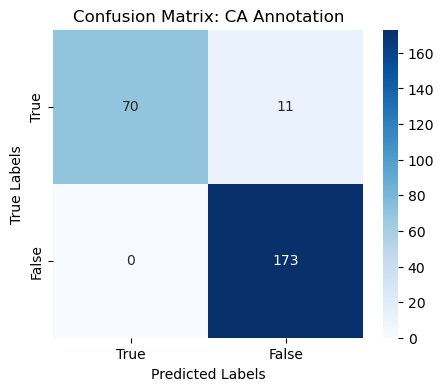

In [7]:
plot_confusion_matrix(df['ca_true'], df['ca_pred'], figsize = (5,4),title="CA Annotation")

# Example Misclassifications

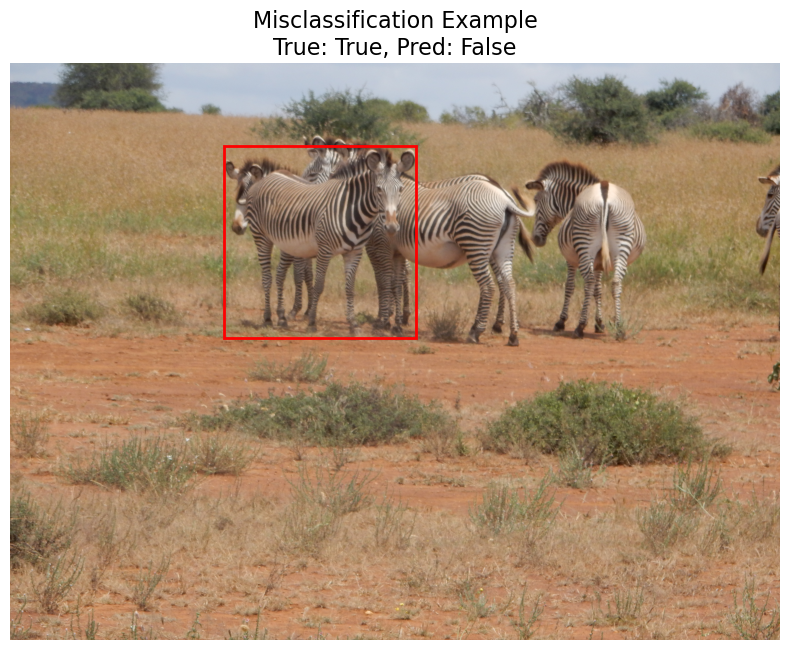

In [8]:
images_dir = "../test_dataset/images"
misclassified = df[df['ca_true'] != df['ca_pred']]
mis_groups = misclassified.groupby(['ca_true', 'ca_pred'])

for (true_label, pred_label), group in mis_groups:
    example = group.sample(n=1).iloc[0]

    img_fname = example['image fname']
    img_path = os.path.join(images_dir, img_fname)

    x = example['bbox x']
    y = example['bbox y']
    w = example['bbox w']
    h = example['bbox h']

    img = Image.open(img_path).convert("RGB")

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(img)
    
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.set_title(f"Misclassification Example\nTrue: {true_label}, Pred: {pred_label}", fontsize=16)
    ax.axis('off')

    plt.tight_layout()
    plt.show()
